In [ ]:
import stream2 as st2
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [ ]:
adata = sc.read("Matrix/data_p3.h5ad")

In [ ]:
sc.pl.umap(adata,color=['final_annot'])

In [ ]:
sc.pp.neighbors(adata,use_rep='X_umap')
sc.tl.leiden(adata)
st2.tl.find_disconnected_components(adata,groups='leiden')
sc.pl.umap(adata,color='partition')

In [ ]:
adata.obs['partition'].value_counts().plot.bar()

In [ ]:
adata.obsm['X_dr'] = adata.obsm['X_umap']
adata.obs['pseudotime_partition'] = np.nan
for part in ['0', '1', '2']:
    cells = adata.obs_names[adata.obs['partition'] == part]
    adata_sub = adata[cells].copy()

    st2.tl.seed_graph(adata_sub, obsm='X_umap', n_clusters=50)

    st2.tl.learn_graph(adata_sub, obsm='X_dr', n_nodes=60, method='principal_tree',)
    
    st2.tl.infer_pseudotime(
        adata_sub,
        source=1,
        key='epg',
        copy=False
    )

    adata.obs.loc[cells, 'pseudotime_partition'] = adata_sub.obs['epg_pseudotime']

adata.obsm['X_dr'] = adata.obsm['X_umap']
st2.pl.dimension_reduction(adata, color=['pseudotime_partition'])
plt.suptitle("UMAP trajectory by STREAM2, Patient 3", fontsize=16, y=1.02)
plt.savefig("Plots/p3.png", dpi=300, bbox_inches='tight')

In [ ]:
st2.tl.seed_graph(adata,obsm='X_umap',use_partition=True)
st2.pl.graph(adata,key='seed_epg',color=['final_annot'])
st2.tl.learn_graph(adata,obsm='X_umap', n_nodes=30,use_partition=True)
st2.pl.graph(adata,key='epg',color=['final_annot'])
st2.pl.graph(adata,key='epg',color=['partition'])
use_partition=['0','1','2']
st2.tl.seed_graph(adata, obsm='X_umap', n_clusters=50,use_partition=use_partition)
st2.tl.learn_graph(adata, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05,use_partition=use_partition)
st2.pl.graph(adata,key='seed_epg',color=['partition'])
st2.pl.graph(adata,key='epg',color=['final_annot'],fig_size=(15,10),save_fig=True,fig_path='Plots/',fig_name='stream2_p3.pdf')

In [ ]:
sadata = st2.tl.get_component(adata,'0')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

sadata = st2.tl.get_component(adata,'1')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

sadata = st2.tl.get_component(adata,'2')
st2.tl._elpigraph._store_graph_attributes(sadata,sadata.obsm['X_umap'],'epg')
st2.pl.graph(sadata,key='epg',color=['final_annot'],show_text=True)

/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_plot.py:1434: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if ann in adata.obs_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:370: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  if 'stream_tree' not in adata.uns_keys():
/home/a.blanc-boekholt/miniconda3/lib/python3.13/site-packages/stream2/plotting/_utils_stream.py:399: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update t

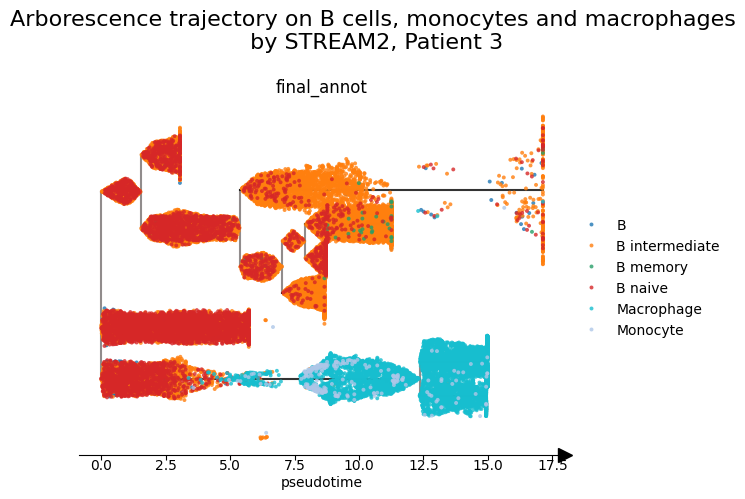

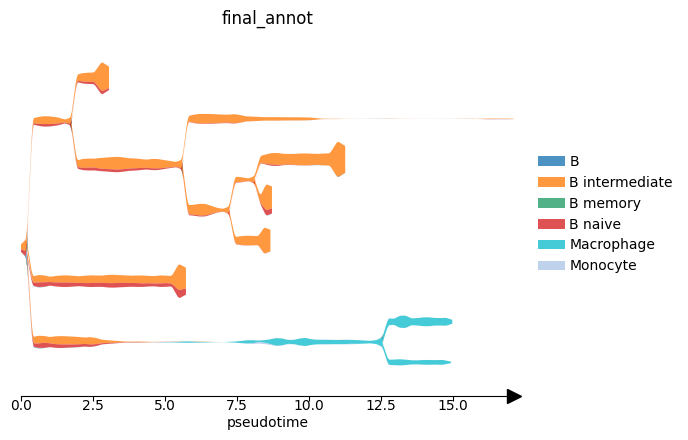

In [44]:
cell_types_to_keep = ['Macrophage', 'Monocyte', 'B', 'B intermediate', 'B memory', 'B naive']
adata_subset = adata[adata.obs['final_annot'].isin(cell_types_to_keep)].copy()
st2.tl.seed_graph(adata_subset, obsm='X_umap', n_clusters=50)
st2.tl.learn_graph(adata_subset, obsm='X_umap', n_nodes=60,epg_alpha=0.01,epg_mu=0.05)
st2.pl.stream_sc(adata_subset, source=8, color=['final_annot'], fig_legend_ncol=1,save_fig=False,show_text=False)
plt.suptitle("Arborescence trajectory on B cells, monocytes and macrophages\n by STREAM2, Patient 3", fontsize=16, y=1.12)
plt.savefig("Plots/p3_arbobis.png", dpi=300, bbox_inches='tight')
st2.pl.stream(adata_subset, source=8, 
              color=['final_annot'],
              fig_legend_ncol=1)